In [235]:
import numpy
import scipy.special

class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
#         set number of nodes in each input, hidden, output layer
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
#         learning rate
        
        self.lr=learningrate
        
#         weight beteewn input, hidden, output

        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
                  # 关于设定初始的权重，使用正态概率分布采样
        self.who=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        
        #sigmoid function 
        self.activation_function=lambda x: scipy.special.expit(x)
        
        
    
        
        pass
        
    def train(self,inputs_list,targets_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        #  计算输出层误差和隐藏层误差
        output_errors=targets-final_outputs
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        #  优化权重矩阵
        self.who+=self.lr*numpy.dot(
            (output_errors*final_outputs*(1.0-final_outputs)),
            numpy.transpose(hidden_outputs))
        
        self.wih+=self.lr*numpy.dot(
            (hidden_errors*hidden_outputs*(1.0-hidden_outputs)),
            numpy.transpose(inputs))
        
        
        
        
        
        pass
        
        
    def query(self,inputs_list):
        
        inputs=numpy.array(inputs_list,ndmin=2).T
        #calculate signals into hidden layer
        hidden_inputs=numpy.dot(self.wih,inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
        pass
        


In [236]:
input_nodes=784
output_nodes=10
hidden_nodes=200
learing_rate=0.3
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learing_rate)


training_data_file=open("mnist_dataset/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()


for record in training_data_list:
    all_values=record.split(',')
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets=numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])]=0.99
    n.train(inputs,targets)


In [237]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print(correct_label,"correct label")
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs)
    print(label,"network's answer")
    
    if(label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2

6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
4 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
4 correct label
9 network's answer
8

2 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6

5 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
0 network's answer
8 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
7 correct label
1 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
5

7 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
2 correct label
6 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5

7 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
4 correct label
6 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
7 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
5

6 correct label
6 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
5 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 ne

5 correct label
5 network's answer
7 correct label
1 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
3 correct label
3 ne

9 network's answer
6 correct label
6 network's answer
4 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
8 correct label
0 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
2

1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
9 correct label
3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
6 correct label
5 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1

3 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
1 network's answer
9 correct label
9 network's answer
7

3 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
1 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
6

4 network's answer
9 correct label
9 network's answer
7 correct label
9 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
3 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
6 correct label
5 network's answer
1 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
5

4 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
8 correct label
4 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
4 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
6

2 network's answer
7 correct label
7 network's answer
8 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
7 correct label
9 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
8 correct label
7 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3

3 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
1 correct label
6 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2

5 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
7 network's answer
5 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3

5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
8 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
3

6 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8

5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
9 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
2 correct label
8 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
7 correct label
7 ne

6 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
8

8 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
3

2 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8

4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
8 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
7 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
3 correct label
2 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7

3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
5 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4

5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 ne

1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 ne

4 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2

0 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
6 correct label
3 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
8

0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
0 correct label
0 ne

In [230]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [238]:
scorecard_array=numpy.asarray(scorecard)
print("performance= ",scorecard_array.sum()/scorecard_array.size)


performance=  0.956


In [225]:
n.query((numpy.asfarray(all_values[1:])))

array([[4.22477930e-02],
       [1.06831711e-02],
       [9.61673856e-01],
       [5.49772195e-01],
       [2.79873736e-04],
       [2.71971862e-04],
       [4.60813420e-04],
       [3.45180297e-03],
       [1.29778528e-04],
       [3.92911288e-04]])

In [232]:
test_data_file=open("mnist_dataset/mnist_test.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

all_values=test_data_list[0].split(',')
print(all_values[0])


7


In [118]:
n.query([1.0,0.5,-1.5])

array([[0.53996847],
       [0.39525301],
       [0.36046277]])

In [42]:
import numpy
a=numpy.zeros([3,2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [51]:
a[0,0]=1
a[0,1]=2
a[1,0]=3
a[1,0]=4
print(a)

[[1. 2.]
 [3. 4.]
 [0. 0.]]


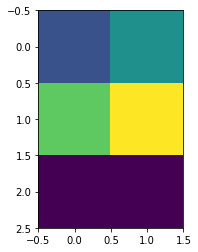

In [54]:
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.imshow(a,interpolation="nearest")

In [59]:
class Dog:
    def bark(self):
        print("sdfsdf")
ss=Dog()
ss.bark()

sdfsdf


In [91]:
import numpy
numpy.random.rand(3,3)-0.5

array([[-0.34362304, -0.21994285,  0.03143301],
       [-0.11440715,  0.0978849 , -0.28619883],
       [ 0.28690564,  0.17763014, -0.37355228]])

In [101]:
numpy.array([((0,1),(2,-1)),((3,4),(7,9))], ndmin=2)

array([[[ 0,  1],
        [ 2, -1]],

       [[ 3,  4],
        [ 7,  9]]])